## Airbnb Prices in European Cities

**This project analyzes Airbnb listings across various European cities to compare the avarage price among cities of Europe to make better quick decisions on where to travel :)**

*I used codes from Python 1 class to make it easy to run and understand*


In [26]:
%pip install matplotlib
%pip install seaborn     #if some of modules are showing not found then you can try or try to run them in Terminal for less mess.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


and below all modules i downloaded to run my codes:

In [6]:
import pandas as pd
import numpy as np
import warnings
import os
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
os.chdir("/Users/feya/Downloads/data science/airbnb-eu-price")  #change directory to where your files are located (this is my directory)
print(os.getcwd()) 

/Users/feya/Downloads/data science/airbnb-eu-price


In [8]:

print(os.getcwd()) #get current working directory



/Users/feya/Downloads/data science/airbnb-eu-price


In [9]:
df = pd.read_csv("data/raw/abnb_eu.csv") #load the data

In [10]:
df.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,city,weekends
0,319.640053,Private room,False,True,2,False,0,1,9,88,1,4.763360,0.852117,Amsterdam,True
1,347.995219,Private room,False,True,2,False,0,1,9,87,1,5.748310,3.651591,Amsterdam,True
2,482.975183,Private room,False,True,4,False,0,1,9,90,2,0.384872,0.439852,Amsterdam,True
3,485.552926,Private room,False,True,2,True,0,0,10,98,1,0.544723,0.318688,Amsterdam,True
4,2771.541724,Entire home/apt,False,False,4,True,0,0,10,100,3,1.686798,1.458399,Amsterdam,True


In [11]:
df.to_csv("data/abnb_eu1.csv", index=False) # I saved a raw data's copy in data file which i can use for editting



In [12]:
df["realSum"] = pd.to_numeric(df["realSum"], errors="coerce").round(0).astype("Int64") #convert price column to numeric and round it to 0 decimal places to further analysis
df["realSum"].dtype


Int64Dtype()

In [13]:
df["realSum"]

0         320
1         348
2         483
3         486
4        2772
         ... 
51702     219
51703     191
51704     252
51705     638
51706     133
Name: realSum, Length: 51707, dtype: Int64

In [14]:
df[["realSum", "city", "guest_satisfaction_overall"]]  #viewing few columns for analysis

,realSum,city,guest_satisfaction_overall
0,320,Amsterdam,88
1,348,Amsterdam,87
2,483,Amsterdam,90
3,486,Amsterdam,98
4,2772,Amsterdam,100
...,...,...,...
51702,219,Vienna,80
51703,191,Vienna,100
51704,252,Vienna,86
51705,638,Vienna,93


In [15]:
df = df.rename(columns={"realSum": "price", "guest_satisfaction_overall": "rating"}) #renamed columns for easier usage

In [16]:
df.shape #checking shape of data

(51707, 15)

In [17]:
df.duplicated().sum() #checking for duplicate values

np.int64(0)

In [18]:
median_price = df.groupby("city")["price"].median() #finding median price of each city, actually was deciding what type of analysis to do here

In [19]:
mean_rate = df.groupby("city")["rating"].mean() #finding mean rating for each city 

In [20]:
print(median_price)
print(mean_rate) #even with big diffrerence in price the ratings are quite similar

city
Amsterdam    460.5
Athens       128.0
Barcelona    208.0
Berlin       191.0
Budapest     153.0
Lisbon       225.0
London       261.0
Paris        318.0
Rome         183.0
Vienna       208.0
Name: price, dtype: Float64
city
Amsterdam    94.514423
Athens       95.003598
Barcelona    91.109072
Berlin       94.323671
Budapest     94.585281
Lisbon       91.093875
London       90.645652
Paris        92.037530
Rome         93.122300
Vienna       93.731128
Name: rating, dtype: float64


*lets compare the prices by countries*

In [21]:
# Group by city (or country)
mean_price = df.groupby("city")["price"].mean()
median_price = df.groupby("city")["price"].median()

print("Median price by city:\n", median_price)
print("\nMean price by city:\n", mean_price)


Median price by city:
 city
Amsterdam    460.5
Athens       128.0
Barcelona    208.0
Berlin       191.0
Budapest     153.0
Lisbon       225.0
London       261.0
Paris        318.0
Rome         183.0
Vienna       208.0
Name: price, dtype: Float64

Mean price by city:
 city
Amsterdam    573.108173
Athens       151.740909
Barcelona     293.79527
Berlin       244.599034
Budapest     176.508454
Lisbon       238.220545
London       362.473031
Paris        392.541717
Rome         205.397142
Vienna       241.591462
Name: price, dtype: Float64


In [22]:
df["median_price"] = "median_price" #adding median price column to the dataframe for better visualization

In [23]:
df.columns

Index(['price', 'room_type', 'room_shared', 'room_private', 'person_capacity',
       'host_is_superhost', 'multi', 'biz', 'cleanliness_rating', 'rating',
       'bedrooms', 'dist', 'metro_dist', 'city', 'weekends', 'median_price'],
      dtype='object')

### Visualisation and comparison of mean

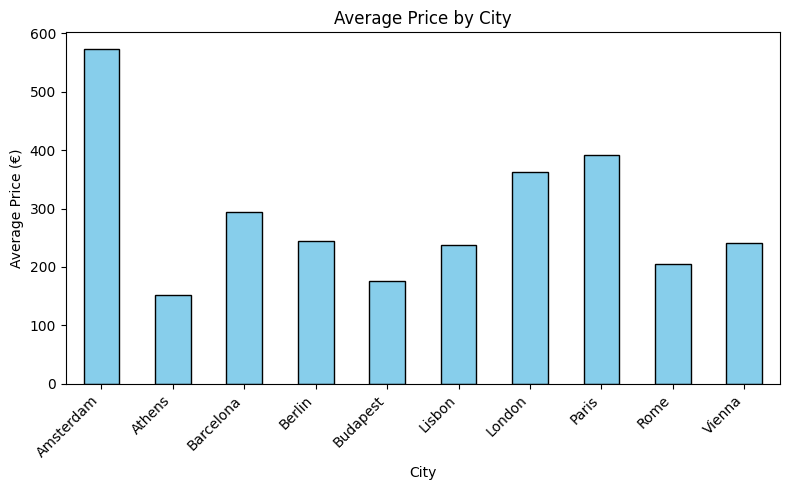

In [24]:
import matplotlib.pyplot as plt

# Group by country (or city if your column is named that)
median_price = df.groupby("city")["price"].mean().sort_values(ascending=False)

# Plot
mean_price.plot(kind="bar", color="skyblue", edgecolor="black", figsize=(8,5))
plt.title("Average Price by City")
plt.xlabel("City")
plt.ylabel("Average Price (€)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.savefig("outputs/avg_price_by_city.png", dpi=300, bbox_inches="tight")

plt.show()

In [25]:
mean_price.to_csv("outputs/avg_price_by_city.csv", index=False) #save as csv file
